### Cluster Analysis & Topic Models

#### Cluster analysis topic model

**Classification**
- Classify similar words or documents into clusters using the relative distance of
- Establish document - word(or word - document) matrix (frequency matrix , TF-IDF, etc.)
- Similarity measurement(Euclidean , Cosine , Jacquard , etc.)
- Classification by applying

**topic model**
- Classify documents based on topics by using the probability of occurrence of latent topics in documents

#### Similarity Measure

**Euclidean Similarity**

- Measure the relative distance difference between 2 document vectors

$$\sqrt{\Sigma_{f = 1}^p (x_{if} - x_{jf})^2}$$

**Cosine Similarity**
- The more similar two vectors are, the closer the cosine value is to 1, the less similar the closer to
- For example, even if the number of occurrences of words in the two documents differs greatly if the ratio is the same, the similarity is high.

$$x \cdot y = ||x|| ||y|| \cos \theta$$

$$\cos \theta = \frac{x \cdot y}{||x|| ||y||} = \frac{\Sigma_{i=1}^n x_i \times y_i}{\sqrt{\Sigma_{i=1}^n x_i^2} \sqrt{\Sigma_{i=1}^n y_i^2}}$$

**1. Cosine Similarity**

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
    return dot(A, B)/(norm(A) * norm(B))

In [2]:
d1 = 'I like apples'
d2 = 'I like mango'
d3 = 'I like mango I like mango'
Word_vectors = ['me' , 'apple' , 'mango' , 'like']

In [3]:
doc1= np.array ([1,1,0,1]) # vector of words from document 1
doc2= np.array ([1,0,1,1]) # vector of words from document 2
doc3= np.array ([2,0,2,2]) # vector of words from document 3
print(cos_sim (doc1, doc2)) # cosine similarity between document 1 and document 2
print(cos_sim (doc1, doc3)) # cosine similarity between document 1 and document 3
print(cos_sim (doc2, doc3)) # cosine similarity between document 2 and document 3

0.6666666666666667
0.6666666666666667
1.0000000000000002


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

matx = np.vstack([doc1, doc2, doc3])
cosine_similarity(matx)

array([[1.        , 0.66666667, 0.66666667],
       [0.66666667, 1.        , 1.        ],
       [0.66666667, 1.        , 1.        ]])

**2. Euclidean Similarity**

In [6]:
def euclidean_dist(x, y) :
    return np.sqrt(np.sum(x * y) ** 2)

In [7]:
new = 'I like apples'

doc1= np.array ([1,1,0,1]) # vector of words from document 1
doc2= np.array ([1,0,1,1]) # vector of words from document 2
doc3= np.array ([2,0,2,2]) # vector of words from document 3
docQ = np.array ((1,1,0,1))

In [8]:
print(euclidean_dist(doc1, docQ))
print(euclidean_dist(doc2, docQ))
print(euclidean_dist(doc3, docQ))

3.0
2.0
4.0


**3. Jacquard smilarity**

In [9]:
# Two words appearing in both documents: apple and banana.
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

then, perform tokenization

In [10]:
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

output the tokenization result

In [11]:
print(tokenized_doc1)
print(tokenized_doc2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


union of document 1 and document 2

In [12]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

{'card', 'you', 'banana', 'like', 'likey', 'holder', 'passport', 'love', 'apple', 'coupon', 'watch', 'everyone'}


intersection of document 1 and document 2

In [13]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'banana', 'apple'}


**Jacquard similarity** means number of intersections divided by number of unions

In [14]:
print(len (intersection)/ len (union))

0.16666666666666666


#### Similarity Between Too many Documents : A non-Hierarchical Clustering Method

**K-means clustering**

- used in non-hierarchical clustering
- Hierarchical clustering becomes less useful as

**Algorithms**

1. Dividing n entities into K predefined clusters and calculating the centroid of each cluster. Use the cluster's mean as the center of the cluster
2. Calculate the distance between each object and the center of the cluster. Calculate
3. Classify each object into the cluster with the shortest distance
4. Repeat the above steps until there are no more clusters

Limitation : The number of clusters must be known in advance. Much influenced by the initial classification. (Different results possible for each analyst)

K-means clustering procedures

<center>

![cluster](./image/cluster.png)

</center>

#### Non-nierarchical clustering method

**Algorithm application**

1.  Divide the 5 objects into 2 predefined clusters and calculate the centroid of each cluster. Randomly classify entities 1 and 2 as cluster A, and entities 3, 4, and 5 as cluster B. The mean of cluster A is (6 (=(4+8)/2), 4 (=(4+4)/2)) and the mean of cluster B is (21, 8) .
2. Calculate the distance between each object and the center of the cluster.
3. Classify each object into the cluster with the shortest distance.
4. Repeat the above steps until there are no more clusters.

Limitation ) The number of clusters must be known in advance. Much influenced by the initial classification. (Different results possible for each analyst)

**4. K-Means Clustering**

National Park Basic Statistics (Source : KOSIS National Statistics Portal)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_csv('../../Data/NLPRK_STA.csv', encoding = 'cp949')
df.head()

,공원명,육지면적,탐방객수
0,지리산,483.022,3308833
1,경주,136.550,2887634
2,계룡산,65.335,1817602
3,한려해상,127.188,6439653
4,설악산,398.237,3241484


In [22]:
len(df)

22

id: national park , variable 1: land area , variable 2: number of visitors => Group id using variable 1 and variable 2

In [23]:
X = df.iloc [:, [1, 2]].values # shape=(22, 2)
n= X.shape [0] # number of sets (n=22)
m= X.shape [1] # number of features (m=2)
name = df.iloc [:,0].values

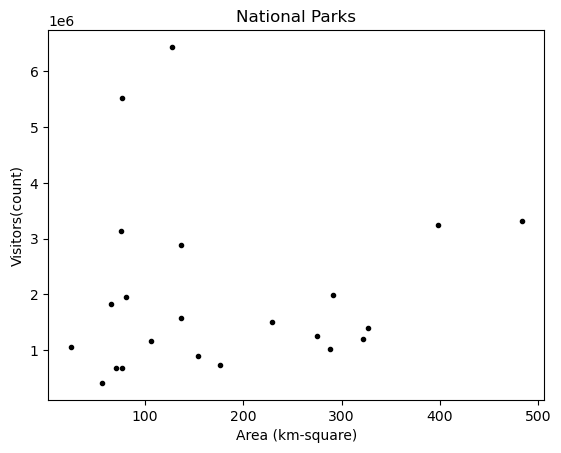

In [26]:
plt.scatter(X[:,0],X[:,1], c = 'black', label = 'national park', marker = '.')
plt.xlabel('Area (km-square)')
plt.ylabel('Visitors(count)')
# plt.legend ()
plt.title('National Parks')
plt.show()